# Statistics for Health Data Science Workshop


---


In this Python workshop session you will do exploratory data analysis and modelling on a small data set to help gain some familiarity with a medical dataset and statistical models.

For the purspose of this workshop we will be using the UCI HCV (Hepatitis C Virus) data set. It is a publicly available dataset that contains clinical and demographic data of 615 patients infected with hepatitis C virus (HCV). The dataset was collected from a clinical trial conducted in Egypt and includes information about patients' age, sex, laboratory test results such as ALT, AST, bilirubin levels, etc.

In this Google Colab file you will go through a completed series of steps with instructions to perform, on your own, additional tasks. At any moment during the lab you can move on the following step by making sure to run the previous ones.

To ease collaboration and discussion, you will sit in teams and work together. At some point during the lab each team will be asked to share the work produced thus far. </br>
**Please don't edit this file, create a copy of this file on your own machine: File > Save a copy in Drive.**

## Step 1: Set up libraries, read in the data

In [ ]:
# Data Cleaning
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy.stats import shapiro, chi2_contingency
import statsmodels.api as sm


# Regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error

In [ ]:
url = "https://raw.githubusercontent.com/claudia-viaro/Statistics-for-Health-Data-Science/main/data/hcvdat0.csv?token=GHSAT0AAAAAACJAQYPLOVQSYESOS6FC4HQ4ZJOTKMA"
dataset = pd.read_csv(url)
dataset.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


## Step 2: Data cleaning
In this step, you are asked to explore and tidy the dataset. That is, you can check for the following:
* number of observations and variables
* names and types of variables, labels of factor variables
* check for missing/NA values and drop them
* assign numerical levels to categorical variables "Category" and "Sex"
* create a binary variable named "Disease" that takes value 0 if the patient is a blood donor (or suspected) and value 1 in the other cases, to denote presence of HCV
* remove the index variable "Unnamed" as it won't be of use

**instead of dropping NA values, can you replace them by the median value of the variable?**


In [ ]:
# quick info on the dataset
dataset.info()

# explore the levels of the factor variables
print(np.unique(np.ravel(dataset[["Category"]])))
print(np.unique(np.ravel(dataset[["Sex"]])))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB
['0=Blood Donor' '0s=suspect Blood Donor' '1=Hepatitis' '2=Fibrosis'
 '3=Cirrhosis']
['f' 'm']


**Note** you can observe that the acronym variables refer to laboratory test results:
* ALB, Albumin
* ALP, Alkaline phosphatase
* ALT, Alanine transaminase
* AST, aspartate aminotransferas
* BIL, Bilirubin
* CHE, cholinesterase
* CHOL, Cholesterol
* CREA, Creatinine
* GGT, Gamma-glutamyl Transferase
* PROT, Total protein test

In [ ]:
# missing values
missing = dataset.isnull().sum()
percent_missing = dataset.isnull().sum() * 100 / len(dataset)
print("missing data \n", missing, "\n", percent_missing)
# We can see that variables ALP and CHOL have, respectively, 18 and 10 missing values, variables PROT and ALT only one

# you can check whether there are also NA values, on top of missing values
dataset.isna().sum() # as you can see, missing data are encoded as NA

# There are several methods to handle missing values. Each method has its own advantages and disadvantages. The choice of the method is subjective and depends on the nature of data
# and the missing values. Here, we will drop NA values
dataset = dataset.dropna()
dataset.shape

# Replace NA values by the median value
na_cols = ['PROT', 'ALP', 'CHOL', 'ALT', 'ALB']
dataset_noNA = dataset
dataset_noNA.fillna((dataset_noNA[na_cols].mean()), inplace=True)
missing_new = dataset_noNA.isnull().sum()
percent_missing_new = dataset_noNA.isnull().sum() * 100 / len(dataset_noNA)
print("missing data \n", missing_new, "\n", percent_missing_new)
# ... write your code here ...

missing data 
 Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64 
 Unnamed: 0    0.000000
Category      0.000000
Age           0.000000
Sex           0.000000
ALB           0.162602
ALP           2.926829
ALT           0.162602
AST           0.000000
BIL           0.000000
CHE           0.000000
CHOL          1.626016
CREA          0.000000
GGT           0.000000
PROT          0.162602
dtype: float64


(589, 14)

In [ ]:
# edit the labels for the categorical variables
dataset["Category1"] = dataset["Category"].map({'0=Blood Donor':0,
                                                '0s=suspect Blood Donor':1,
                                                '1=Hepatitis':2,
                                                '2=Fibrosis':3,
                                                '3=Cirrhosis':4})
dataset["Sex1"]=dataset["Sex"].map({'m':0,
                                    'f':1})
dataset["Disease"] = dataset['Category'].replace({'0=Blood Donor': 0,
                                                  '0s=suspect Blood Donor': 0,
                                                  '1=Hepatitis': 1,
                                                  '2=Fibrosis': 1,
                                                  '3=Cirrhosis': 1})
dataset = dataset.drop(columns = ["Category", "Sex"])

# remove ID variable
dataset = dataset.iloc[: , 1:]
dataset.head()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category1,Sex1,Disease
0,32,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0,0,0
1,32,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0,0,0
2,32,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0,0,0
3,32,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0,0,0
4,32,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0,0,0


## Step 3: Describe
### LABORATORY TEST RESULTS
* Use the function describe to provide a summary tables for the laboratory test results, controlling for 2 decimal figures
* Plot the distribution of the test results using a histogram, overlaying a normal density
* Produce a boxplot of the results
* Test for normality of the data using a test of your choice and comment on the output
* Construct a 95% confidence interval on the lab test results
</br>

**Complete on the rest of the variables. Can you produce a single table with the lab results as columns? Are there outliers? Can you plot the results and test for normality using a for loop? Can you plot a boxplot for all the results in a single figure? How do you interpret the results for the normality test? Print the result of the test as you loop over the variables. Can you produce q-q plots, what information do they convey?**

In [ ]:
creatinine = 'CREA'
print("Creatine Lab Test Results\n", dataset[creatinine].describe().apply("{0:.2f}".format))

Creatine Lab Test Results
 count     589.00
mean       81.67
std        50.70
min         8.00
25%        68.00
50%        77.00
75%        89.00
max      1079.10
Name: CREA, dtype: object


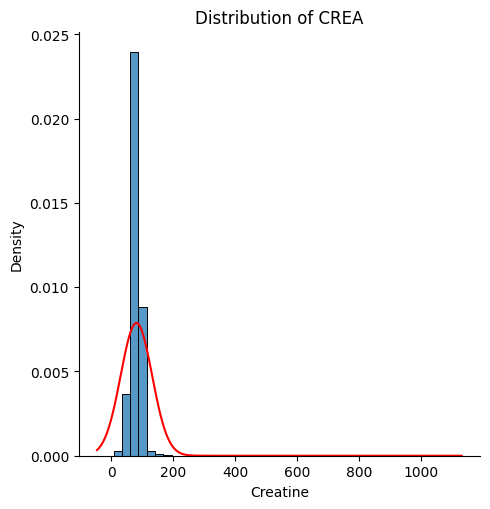

In [ ]:
# histogram

# function for mapping the normal pdf
def map_pdf(x, **kwargs):
    mu, std = scipy.stats.norm.fit(x)
    x0, x1 = p1.axes[0][0].get_xlim()  # axes for p1 is required to determine x_pdf
    x_pdf = np.linspace(x0, x1, len(x))
    y_pdf = scipy.stats.norm.pdf(x_pdf, mu, std)
    plt.plot(x_pdf, y_pdf, c='r')

p1 = sns.displot(x=creatinine, data = dataset, kind='hist', bins=40, stat='density')
p1.map(map_pdf, creatinine)
p1.set(title='Distribution of '+ creatinine,
       xlabel='Creatine')
print(p1)

Axes(0.125,0.11;0.775x0.77)


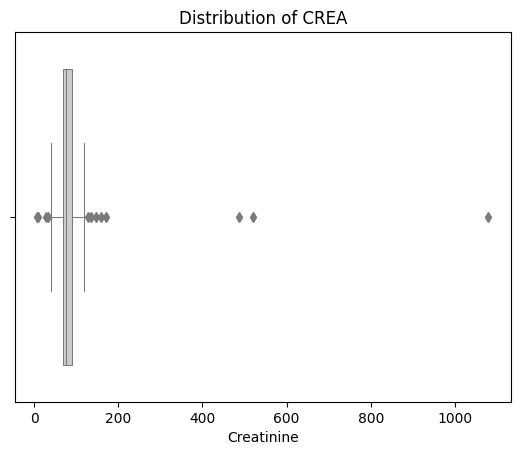

In [ ]:
# boxplot

p2 = sns.boxplot(data=dataset, x=creatinine, color=".8", linewidth=.75)
p2.set(title='Distribution of '+ creatinine,
       xlabel='Creatinine')
print(p2)

Top and bottom 1% 
 0.01     44.872
0.50     77.000
0.99    137.444
Name: CREA, dtype: float64


<Axes: xlabel='CREA'>

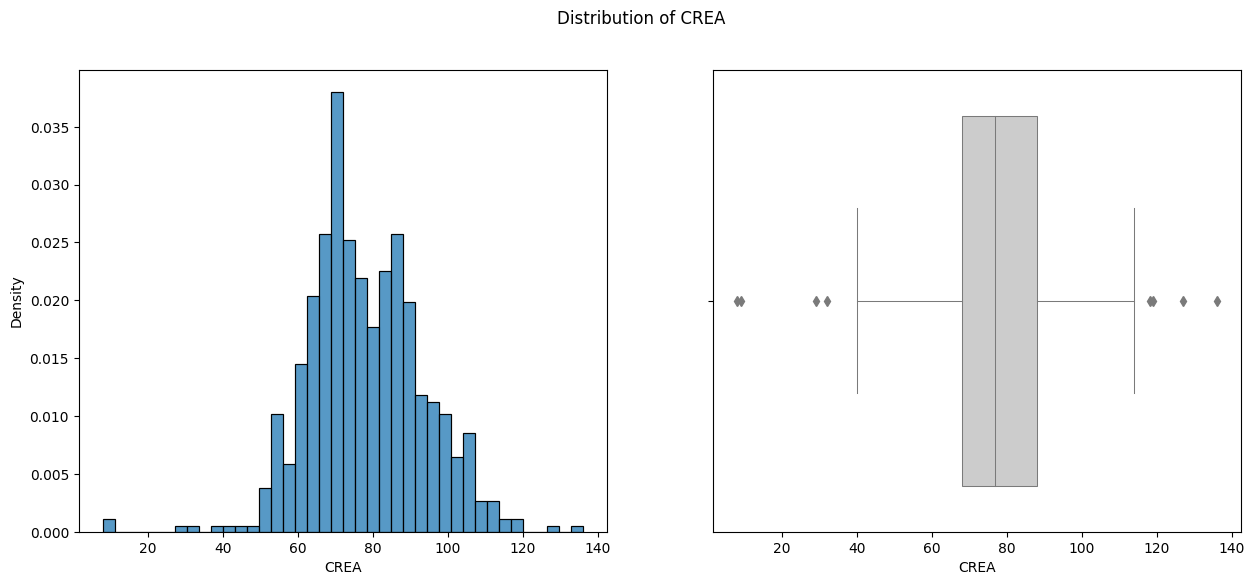

In [ ]:
# from the histogram and the boxplot we can observe that the variable creatinine may include a very large outlier
# compute top and bottom 1%, median
print("Top and bottom 1% \n", dataset[creatinine].quantile([0.01, 0.5, 0.99]))
# given the right tail of the distribution, remove the top 1% and replot histogram and boxplot
df_crea = dataset[dataset[creatinine] < dataset[creatinine].quantile(0.99)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Distribution of '+ creatinine)
sns.histplot(data = df_crea, x=creatinine, bins=40, stat='density', ax=ax1)
sns.boxplot(data = df_crea, x=creatinine, color=".8", linewidth=.75, ax=ax2)

In [ ]:
# test for normality of data

stat, p = shapiro(dataset[creatinine])
print(creatinine, ' Statistics=%.3f, p=%.3f' % (stat, p))

# q-q- plot
# ... write your code here

CREA  Statistics=0.243, p=0.000


In [ ]:
# 95% confidence interval on creatinine

# Sample size
n = len(dataset[creatinine])
# Confidence level
C = 0.95  # 95%
# Significance level, α
alpha = 1 - C
# Number of tails
tails = 2
# Quantile (the cumulative probability)
q = 1 - (alpha / tails)
# Degrees of freedom
dof = n - 1
# Critical t-statistic, calculated using the percent-point function (aka the
# quantile function) of the t-distribution
t_star = scipy.stats.t.ppf(q, dof)
# Confidence interval
ci_upper = dataset[creatinine].mean() + t_star * dataset[creatinine].std() / np.sqrt(n)
ci_lower = dataset[creatinine].mean() - t_star * dataset[creatinine].std() / np.sqrt(n)

print(f'We are 95% sure that the true mean lies between {ci_lower:4.1f} and {ci_upper:5.1f}')

We are 95% sure that the true mean lies between 77.6 and  85.8


In [ ]:
# reproduce the results for all the lab test result variables

### DEMOGRAPHICS
* create a variable named "age_group" that groups age in the following categories: <30, 30-39, 40-49, >49
* summarise patients counting observations by age group and sex
* summarise patients counting observations by age group and disease
* produce a summary table of the lab test results by age group and sex
* plot histogram of lab test results grouping by sex

**Can you plot lab test results grouping by age categories? Choose the type of graph you prefer. Do you observe any differences in the test results among men and wone and across age groups?**

In [ ]:
dataset.loc[dataset['Age']<=30, 'age_group'] = '<30'
dataset.loc[dataset['Age'].between(30,39), 'age_group'] = '30-39'
dataset.loc[dataset['Age'].between(40,49), 'age_group'] = '40-49'
dataset.loc[dataset['Age'].between(50,59), 'age_group'] = '50-59'
dataset.loc[dataset['Age'].between(60,69), 'age_group'] = '60-69'
dataset.loc[dataset['Age']>69, 'age_group'] = '>69'

group = dataset.groupby(['Sex1', 'age_group'])
group = group.size()
print(group.reset_index(name='Count observations'))

# What do you observe?

    Sex1 age_group  Count observations
0      0     30-39                  99
1      0     40-49                 114
2      0     50-59                  98
3      0     60-69                  39
4      0       <30                   4
5      0       >69                   9
6      1     30-39                  50
7      1     40-49                  79
8      1     50-59                  73
9      1     60-69                  23
10     1       >69                   1


In [ ]:
# count patients (with %) grouping by presence of HCV virus and age group

df_plot = dataset.groupby(['age_group','Disease']).size().reset_index()
df_plot.columns = ['age_group','Disease', 'count']
df_plot = df_plot.astype({'Disease':'str'})
df_plot['percentage'] = dataset.groupby(['age_group','Disease'], group_keys=True).size().groupby(level=0).apply(lambda x: 100*x/float(x.sum())).values.round(2).astype(str)
df_plot['percentage'] = "(" + df_plot['percentage'] + '%)'
df_plot

<ipython-input-132-251a6af2c111>:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_plot['percentage'] = dataset.groupby(['age_group','Disease'], group_keys=True).size().groupby(level=0).apply(lambda x: 100*x/float(x.sum())).values.round(2).astype(str)


,age_group,Disease,count,percentage
0,30-39,0,139,(93.29%)
1,30-39,1,10,(6.71%)
2,40-49,0,180,(93.26%)
3,40-49,1,13,(6.74%)
4,50-59,0,150,(87.72%)
5,50-59,1,21,(12.28%)
6,60-69,0,55,(88.71%)
7,60-69,1,7,(11.29%)
8,<30,1,4,(100.0%)
9,>69,0,9,(90.0%)


In [ ]:
# summary of creatinine by age group

sum_df = dataset.groupby(['Sex1', 'age_group'])[[creatinine]].mean().add_prefix('mean_').reset_index()
sum_df

,Sex1,age_group,mean_CREA
0,0,30-39,88.510101
1,0,40-49,94.399123
2,0,50-59,83.829592
3,0,60-69,83.982051
4,0,<30,64.150000
5,0,>69,74.222222
6,1,30-39,70.032000
7,1,40-49,75.427848
8,1,50-59,69.839726
9,1,60-69,67.095652


<Axes: xlabel='CREA', ylabel='Count'>

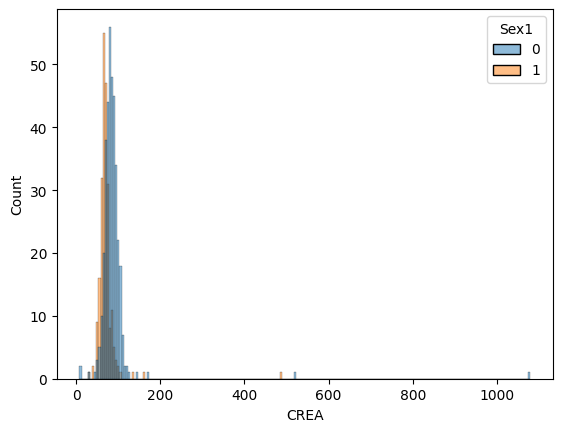

In [ ]:
# histogram of creatinine by sex
p1 = sns.histplot(x=creatinine, data = dataset, hue = 'Sex1')
p1

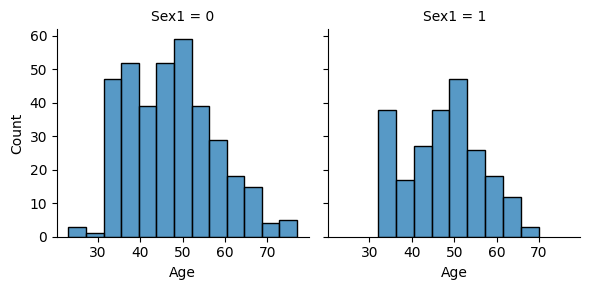

In [ ]:
# histogram of creatinine by sex

g = sns.FacetGrid(dataset, col="Sex1")
g.map(sns.histplot, "Age")

In [ ]:
# reproduce the results for all the lab test result variables

### CATEGORY

* count individuals with and without the virus
* plot the proportions of individuals with and without the virus
* plot the same distinguishing between the initial 5 categories related to the virus

Count individuals with/without virus 
 0    533
1     56
Name: Disease, dtype: int64


<Axes: ylabel='Sex1'>

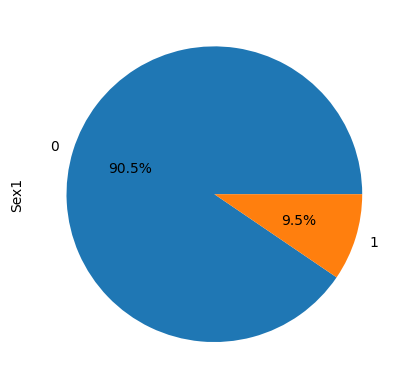

In [ ]:
# summarize category variable
print("Count individuals with/without virus \n", dataset["Disease"].value_counts())

# plot the proportions of individuals with and without the virus
pie_df = dataset.groupby(['Disease'])[['Sex1']].count().reset_index()
pie_df['Sex1'].plot.pie(autopct='%1.1f%%')

# plot the same distinguishing between the initial 5 categories related to the virus
# ... write your code here

Looking at the counts for each classes, class 0 (Blood donor) has the highest count followed by class 4 (Cirrhosis), class 2 (Hepatitis) and class 3 (Fibrosis). Class 1 (Suspect blood donor) is the class with the least count.

## Step 4: Relationship between variables
* produce a correlation matrix and plot between lab test results
* use a Chi squared test to investigate independence between presence of the virus and age groups
* use a Chi squared test to investigate independence between presence of the virus and sex
* use t-test and plots to investigate independence between lab test results and sex
* use t-test and plots to investigate independence between lab test results and presence of virus

**Do you observe any 'strong' relation between lab test results looking at the correlation plot and the correlation matrix? What is the null hipothesis of the Chi square test? What do you conclude from the output? Do you observe any dependence between lab test results and sex? What would you expect to observe if they are pairwise independent? How about between lab test results and presence of virus **

Correlation matrix creatinine VS Bilirubin 
          CREA      BIL
CREA  1.00000  0.01991
BIL   0.01991  1.00000


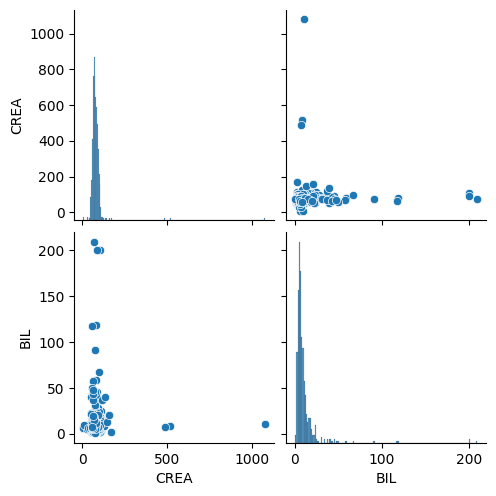

In [ ]:
# correlation matrix and plot between lab test results

corr_df = pd.DataFrame(dataset, columns=[creatinine, 'BIL'])
corr_matrix = corr_df.corr()
print("Correlation matrix creatinine VS Bilirubin \n",  corr_matrix)

sns.pairplot(corr_df)

In [ ]:
## Chi square test

VirusAge_corr = pd.crosstab(dataset["Disease"], dataset["age_group"])
print("Crosstabulation table Virus VS Age group \n", VirusAge_corr)
print("Chi square test p-value", round(chi2_contingency(VirusAge_corr)[1], 4))

VirusSex_corr = pd.crosstab(dataset["Disease"], dataset["Sex1"])
print("Crosstabulation table Virus VS Sex \n", VirusSex_corr)
print("Chi square test p-value", round(chi2_contingency(VirusSex_corr)[1], 4))

Crosstabulation table Virus VS Age group 
 age_group  30-39  40-49  50-59  60-69  <30  >69
Disease                                        
0            139    180    150     55    0    9
1             10     13     21      7    4    1
Chi square test p-value 0.0
Crosstabulation table Virus VS Sex 
 Sex1       0    1
Disease          
0        323  210
1         40   16
Chi square test p-value 0.1497


T-test sex and creatinine 
 TtestResult(statistic=4.4414625254341855, pvalue=1.0733802628857258e-05, df=570.3506927862985)


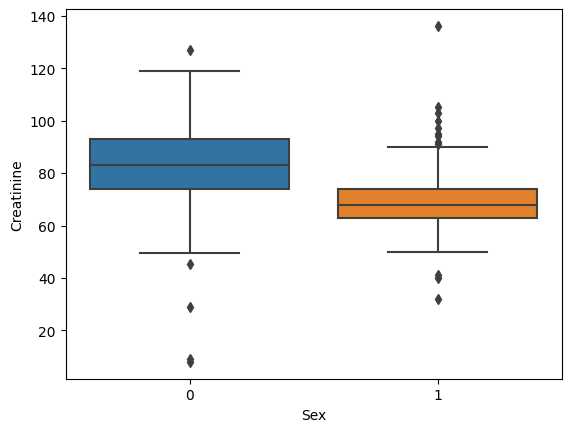

In [ ]:
# explore relationship between lab test results and sex (use the variable CREA without outliers)

sns.boxplot(x="Sex1", y=creatinine, data=df_crea).set(
            xlabel='Sex',
            ylabel='Creatinine')

m_crea = dataset[dataset['Sex1'] == 0][creatinine]
f_crea = dataset[dataset['Sex1'] == 1][creatinine]
print("T-test sex and creatinine \n", scipy.stats.ttest_ind(
    m_crea, f_crea, equal_var = False
))

# What can you observe from the graph and the test? Is sex independent of the measurement of creatinine level?

T-test virus and creatinine 
 TtestResult(statistic=-1.3797048038541422, pvalue=0.173249651052081, df=55.114349326662825)


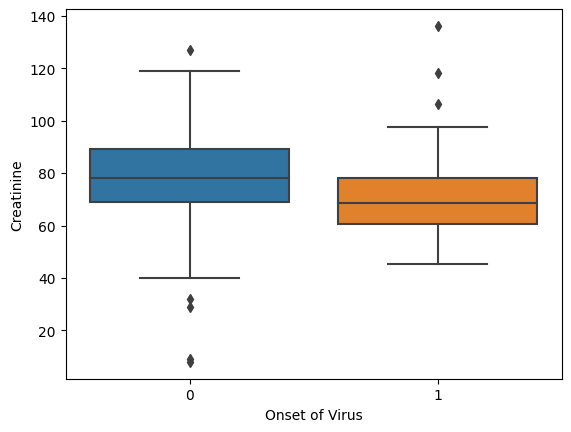

In [ ]:
# explore relationship between lab test results and onset of virus (use the variable CREA without outliers)

sns.boxplot(x="Disease", y=creatinine, data=df_crea).set(
            xlabel='Onset of Virus',
            ylabel='Creatinine')

N_crea = dataset[dataset['Disease'] == 0][creatinine]
Y_crea = dataset[dataset['Disease'] == 1][creatinine]
print("T-test virus and creatinine \n", scipy.stats.ttest_ind(
    N_crea, Y_crea, equal_var = False
))

# What can you observe from the graph and the test? Is the onset of the virus independent of the measurement of creatinine level?

In [ ]:
# reproduce the results for all the lab test result variables

## Step 4: Linear regression (Predicting CHOL value using other variables)
* Scatterplot
* Build the model
* Check the assumption: Linear, Homoscedasticity, Independently normally distributed residuals
* Interpret the result: correlation coefficient, R^2

The R^2 score is: 0.044276524994696254


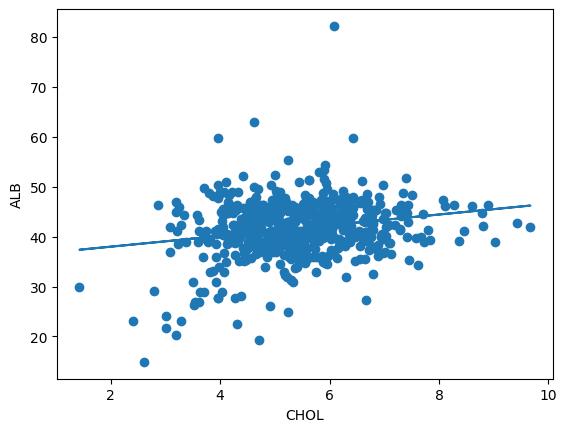

In [ ]:
x = dataset["CHOL"].values.reshape(-1,1)
y = dataset["ALB"].values.reshape(-1,1)
s_reg = LinearRegression()
s_reg.fit(x,y)
y_pred = s_reg.predict(dataset["CHOL"].values.reshape(-1,1))
plt.scatter(x,y)
plt.plot(x,y_pred)
plt.xlabel("CHOL")
plt.ylabel("ALB")
print("The R^2 score is:", r2_score(y, y_pred))

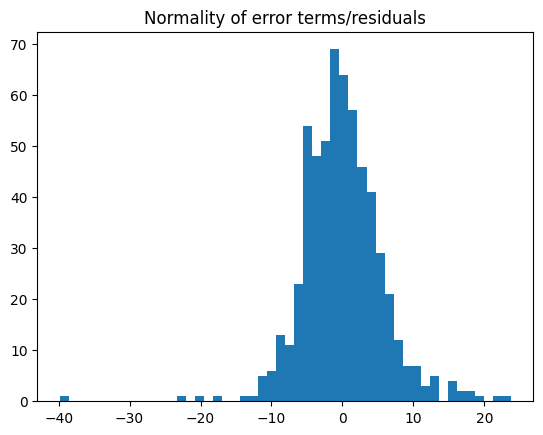

In [ ]:
# Check the distribution of residuals
residuals = y_pred-y
plt.hist(residuals, bins=50)
p=plt.title("Normality of error terms/residuals")

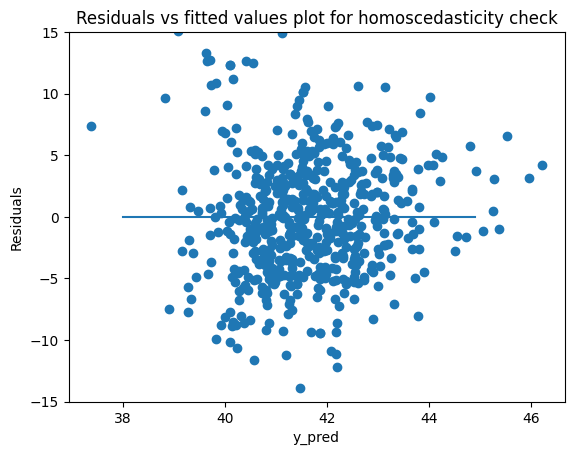

In [ ]:
# Check the homoscedasticity
plt.scatter(y_pred,residuals)
plt.xlabel('y_pred')
plt.ylabel("Residuals")
plt.ylim(-15,15)
xx= [0.1 * i + 38 for i in range(70)]
plt.plot(xx,[0 for i in range(70)])
p=plt.title("Residuals vs fitted values plot for homoscedasticity check")

In [ ]:
# we could use another module to directly output all evaluation metrics
x_ = sm.add_constant(x)
est = sm.OLS(y,x_)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     27.19
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           2.55e-07
Time:                        13:27:14   Log-Likelihood:                -1853.4
No. Observations:                 589   AIC:                             3711.
Df Residuals:                     587   BIC:                             3720.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.8345      1.134     31.592      0.0

### What you try:
* Use other variable to predict CHOL and check the assumption
* Interpretate the result
* Try to add more variables to the model

In [ ]:
# ... write your code here

## Step 5: Logistic Regression (Classify the samples into Blood donors and Hepatitis C disease)
* Scatterplot
* Build the univariate logistic regression
* Intepret the results: beta coefficient, correlation coefficient, R^2
* Check the assumption: Linear, Homoscedasticity, independently normally distributed residuals

In [ ]:
log_reg = LogisticRegression(solver = 'lbfgs', max_iter=1000)
y = dataset["Disease"].values.reshape(-1,1)
x = dataset["ALB"].values.reshape(-1,1)
# x = dataset.drop(columns = ["Disease","age_group"])
log_reg.fit(x, y)
y_pred_lg = log_reg.predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# ... write your comments here

In [ ]:
# plot the probability
x_r = max(x)[0]-min(x)[0]
x_range = [i+min(x)[0] for i in range(x_r)]
pro_y = [ log_reg.predict_proba([[i]])[:,1] for i in x_range]
plt.scatter(x, y)
plt.plot(x_range, pro_y)

TypeError: ignored

In [ ]:
# You can also use the function in seaborn to generate the plot
sns.regplot(x='Age', y='Disease', data=dataset, logistic=True)

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y, y_pred_lg)))

In [ ]:
# Again, we could also use the statsmodels package to build the model and generate the results
lg_m = sm.GLM(y, sm.add_constant(x), family = sm.families.Binomial())
results = lg_m.fit()
results.summary()

### What you can try:
* Try to include more variables, build the multivarate logistic regression and see how accuracy score change.
* Intepretate the result and check the assumption: Does the log odd show a linear relationship with all other variables?

In [ ]:
# ... write your code here

## Extra: Model Selection - Which variables should be in a model?
You have seen up to this point that there can be multiple model specifications to predict the onset of hepatitis disease. Model selection is the process of selecting a model from a set of candidate models. </br>

There exists multiple measures to perform model selection, here we will explore a probabilistic approach. It takes into account the balance between goodness of fit (how well a candidate model has performed in terms of log-likelihood) and complexity of the model (number of parameters in the model). </br>

Within the probabilistic approach we can identify two main measures:
* Akaike Information Criterion (AIC)
* Bayesian Information Criterion (BIC) </br>

They are both relative measures, these values shall be compared across models with an increasing number of parameters, thus judging whether a larger model should be preferred over a smaller one. </br>

The smaller AIC/BIC the better the model. </br>
For more info you can read <a href='https://machinelearningabc.medium.com/model-selection-with-aic-bic-10ac9dac4c5a'>here</a>


In [ ]:
# if you remember the regression output tavle included a value for the AIC/BIC